In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris = pd.read_csv('iris.csv')

In [5]:
iris.info()#checking how many values, and if some values are inconsistent like are they null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


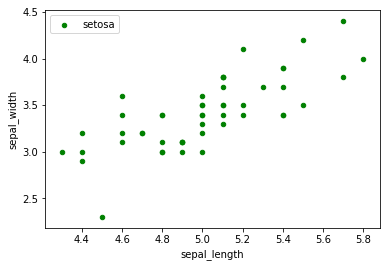

In [7]:
fig = iris[iris.species == 'setosa'].plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', label='setosa', color='green')

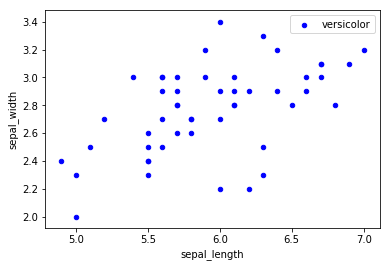

In [8]:
fig1 = iris[iris.species == 'versicolor'].plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', label='versicolor', color='blue')

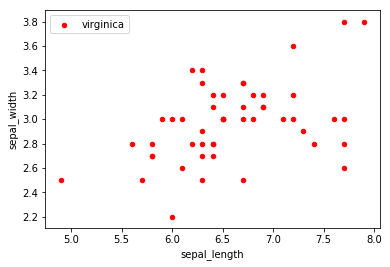

In [9]:
fig2 = iris[iris.species == 'virginica'].plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', label='virginica', color='red')

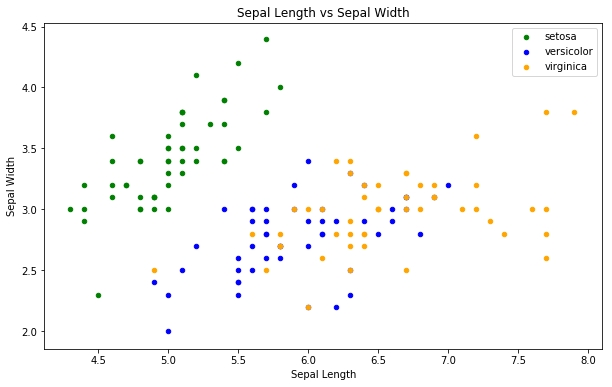

In [13]:
#sepal length vs sepal width
fig = iris[iris.species == 'setosa'].plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', label='setosa', color='green')
iris[iris.species == 'versicolor'].plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', label='versicolor', color='blue', ax=fig)
iris[iris.species == 'virginica'].plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', label='virginica', color='orange', ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Sepal Width')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

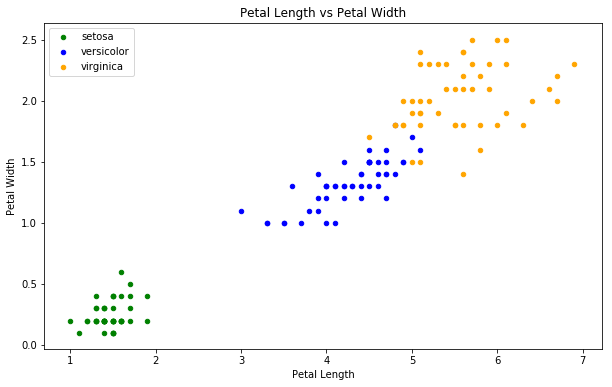

In [12]:
#petal length vs petal width
fig = iris[iris.species == 'setosa'].plot(kind = 'scatter', x = 'petal_length', y = 'petal_width', label='setosa', color='green')
iris[iris.species == 'versicolor'].plot(kind = 'scatter', x = 'petal_length', y = 'petal_width', label='versicolor', color='blue', ax=fig)
iris[iris.species == 'virginica'].plot(kind = 'scatter', x = 'petal_length', y = 'petal_width', label='virginica', color='orange', ax=fig)
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length vs Petal Width')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

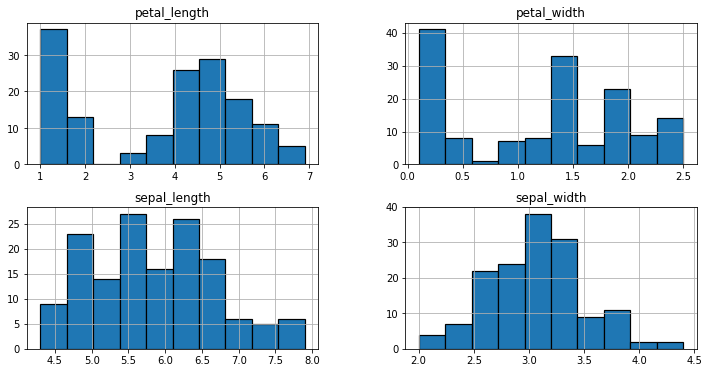

In [14]:
#length and width distribution
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [15]:
iris.shape

(150, 5)

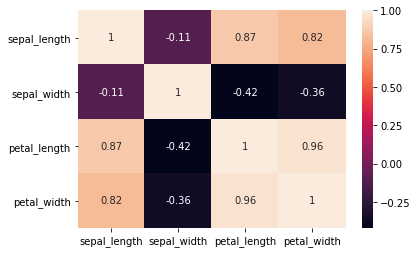

In [16]:
sns.heatmap(iris.corr(), annot = True)

In [17]:
#steps to follow when applying classification or regression algorithm 
# 1. split data set into training and test data set. test dataset is generally smaller because we want more data to train for getting accurate answers
# 2. select any algorithm based on the problem -> classification or regression
# 3. pass the training set to the algorithm to train it. .fit() method does this
# 4. pass the test data to training algorithm to predict outcome. .predit() used.
# 5. calculate accuracy by passing the predicted outcome and the actual output. 

In [18]:
#importing necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

C:\Users\mitra\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
train, test = train_test_split(iris, test_size = 0.3) # training set= 70%, test set = 30%

In [20]:
train.shape

(105, 5)

In [21]:
test.shape

(45, 5)

In [22]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] #training features
train_Y = train[['species']]
test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] #test features
test_Y = test[['species']]

In [23]:
test_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
120,6.9,3.2,5.7,2.3
37,4.9,3.1,1.5,0.1


In [24]:
test_Y.head(2)

,species
120,virginica
37,setosa


In [25]:
train_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
107,7.3,2.9,6.3,1.8
8,4.4,2.9,1.4,0.2


In [26]:
train_Y.head()

,species
107,virginica
8,setosa
29,setosa
92,versicolor
126,virginica


In [27]:
#SVM Model
model = svm.SVC()
model.fit(train_X, train_Y.values.ravel()) #train the data, .fit
prediction = model.predict(test_X) #pass test data to predict outcome
print("Accuracy of svm: ", metrics.accuracy_score(prediction, test_Y))

Accuracy of svm:  1.0


In [28]:
#logistic regression
model = LogisticRegression()
model.fit(train_X, train_Y.values.ravel())
prediction = model.predict(test_X)
print("Accuracy of logistic regression: ", metrics.accuracy_score(prediction, test_Y))

Accuracy of logistic regression:  0.9555555555555556


In [29]:
#decision tree
model = DecisionTreeClassifier()
model.fit(train_X, train_Y.values.ravel())
prediction = model.predict(test_X)
print("Accuracy of decision tree classification ", metrics.accuracy_score(prediction, test_Y))

Accuracy of decision tree classification  0.9777777777777777


In [30]:
#knn
model = KNeighborsClassifier(n_neighbors = 3)#this examines 3 neighbors when putting i the element into a class
model.fit(train_X, train_Y.values.ravel())
prediction = model.predict(test_X)
print("Accuracy of knn with 3 neighbors", metrics.accuracy_score(prediction, test_Y))

Accuracy of knn with 3 neighbors 0.9555555555555556


In [31]:
#now for different values of k 1,10
a = pd.Series()
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y.values.ravel())
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

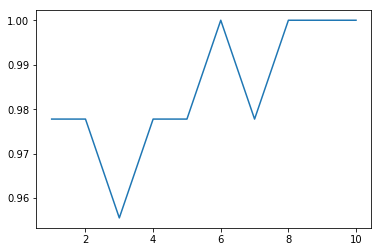

In [32]:
a_index = list(range(1,11))
plt.plot(a_index,a)

In [33]:
#Now instead of using all features in training data set, use petals and sepals separately
petals = iris[['petal_length', 'petal_width', 'species']]
sepals = iris[['sepal_length', 'sepal_width', 'species']]
train_p, test_p = train_test_split(petals, test_size=0.3)
train_p_X = train_p[['petal_length', 'petal_width']]
train_p_Y = train_p[['species']]
test_p_X = test_p[['petal_length', 'petal_width']]
test_p_Y = test_p[['species']]
train_s, test_s = train_test_split(sepals, test_size=0.3)
train_s_X = train_s[['sepal_length', 'sepal_width']]
train_s_Y = train_s[['species']]
test_s_X = test_s[['sepal_length', 'sepal_width']]
test_s_Y = test_s[['species']]


In [34]:
train_p_Y.head()

,species
129,virginica
2,setosa
54,versicolor
10,setosa
77,versicolor


In [35]:
#SVM Model
model = svm.SVC()
model.fit(train_p_X, train_p_Y.values.ravel())
prediction = model.predict(test_p_X)
print("Accuracy of SVM using Petal features: ", metrics.accuracy_score(prediction, test_p_Y))

model = svm.SVC()
model.fit(train_s_X, train_s_Y.values.ravel())
prediction = model.predict(test_s_X)
print("Accuracy of SVM using Sepal features: ", metrics.accuracy_score(prediction, test_s_Y))

Accuracy of SVM using Petal features:  0.9333333333333333
Accuracy of SVM using Sepal features:  0.8


In [36]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_p_X, train_p_Y.values.ravel())
prediction = model.predict(test_p_X)
print("Accuracy of logistic regression using Petals: ", metrics.accuracy_score(prediction, test_p_Y))

#Logistic Regression
model = LogisticRegression()
model.fit(train_s_X, train_s_Y.values.ravel())
prediction = model.predict(test_s_X)
print("Accuracy of logistic regressionusing Sepals: ", metrics.accuracy_score(prediction, test_s_Y))

Accuracy of logistic regression using Petals:  0.8888888888888888
Accuracy of logistic regressionusing Sepals:  0.6


In [37]:
#Decision Tree:
model = DecisionTreeClassifier()
model.fit(train_p_X, train_p_Y.values.ravel())
prediction = model.predict(test_p_X)
print("Accuracy of decision tree classification using Petals: ", metrics.accuracy_score(prediction, test_p_Y))

#Decision Tree:
model = DecisionTreeClassifier()
model.fit(train_s_X, train_s_Y.values.ravel())
prediction = model.predict(test_s_X)
print("Accuracy of decision tree classification using Sepals: ", metrics.accuracy_score(prediction, test_s_Y))

Accuracy of decision tree classification using Petals:  0.9555555555555556
Accuracy of decision tree classification using Sepals:  0.6


In [38]:
#KNN
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(train_p_X, train_p_Y.values.ravel())
prediction = model.predict(test_p_X)
print("Accuracy of KNN using Petals: ", metrics.accuracy_score(prediction, test_p_Y))

#KNN
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(train_s_X, train_s_Y.values.ravel())
prediction = model.predict(test_s_X)
print("Accuracy of KNN using Sepals: ", metrics.accuracy_score(prediction, test_s_Y))

Accuracy of KNN using Petals:  0.9555555555555556
Accuracy of KNN using Sepals:  0.7111111111111111


In [39]:
#observation: Using Petals over sepals for training the data gives better accuracy This is as per expectation in the heatmap. 
#sepal_width correlation with sepal_length is -0.11 
#petal_width correlation with petal_length is 0.96. 